<a href="https://colab.research.google.com/github/rizalanhari/PCVK_Genap_2021/blob/main/car_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
from google.colab.patches import cv2_imshow

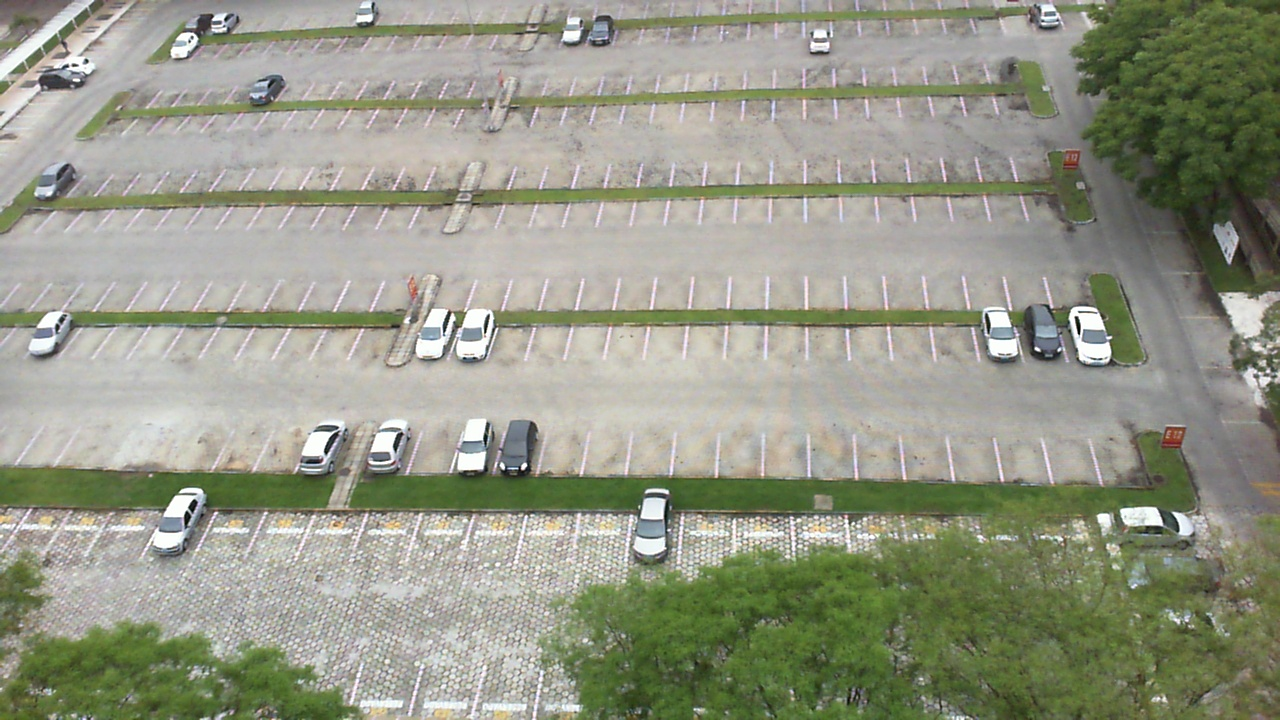

In [33]:
parking_lot = cv2.imread('/content/drive/MyDrive/PCVK Project/Car Park/2012-10-26_06_59_26.jpg')
cv2_imshow(parking_lot)

In [34]:
car_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK Project/cars6.xml')
parking_lot_2 = cv2.imread('/content/drive/MyDrive/PCVK Project/Car Park/2012-10-26_06_59_26.jpg')

<Figure size 720x720 with 0 Axes>

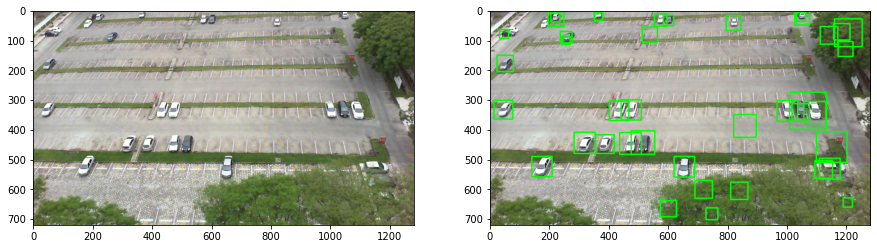

39


In [35]:
jumlah =0;
gray = cv2.cvtColor(parking_lot, cv2.COLOR_BGR2GRAY)
cars = car_cascade.detectMultiScale(gray)
for(x,y,w,h) in cars: 
 cv2.rectangle(parking_lot,(x,y),(x+w,y+h),(0,255,0),3) 
 jumlah+=1;
plt.figure(figsize = (10,10)) 

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv2.cvtColor(parking_lot_2, cv2.COLOR_BGR2RGB))
axarr[0].imshow(cv2.cvtColor(parking_lot_2, cv2.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv2.cvtColor(parking_lot, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(parking_lot, cv2.COLOR_BGR2RGB))
plt.show()
print(jumlah)

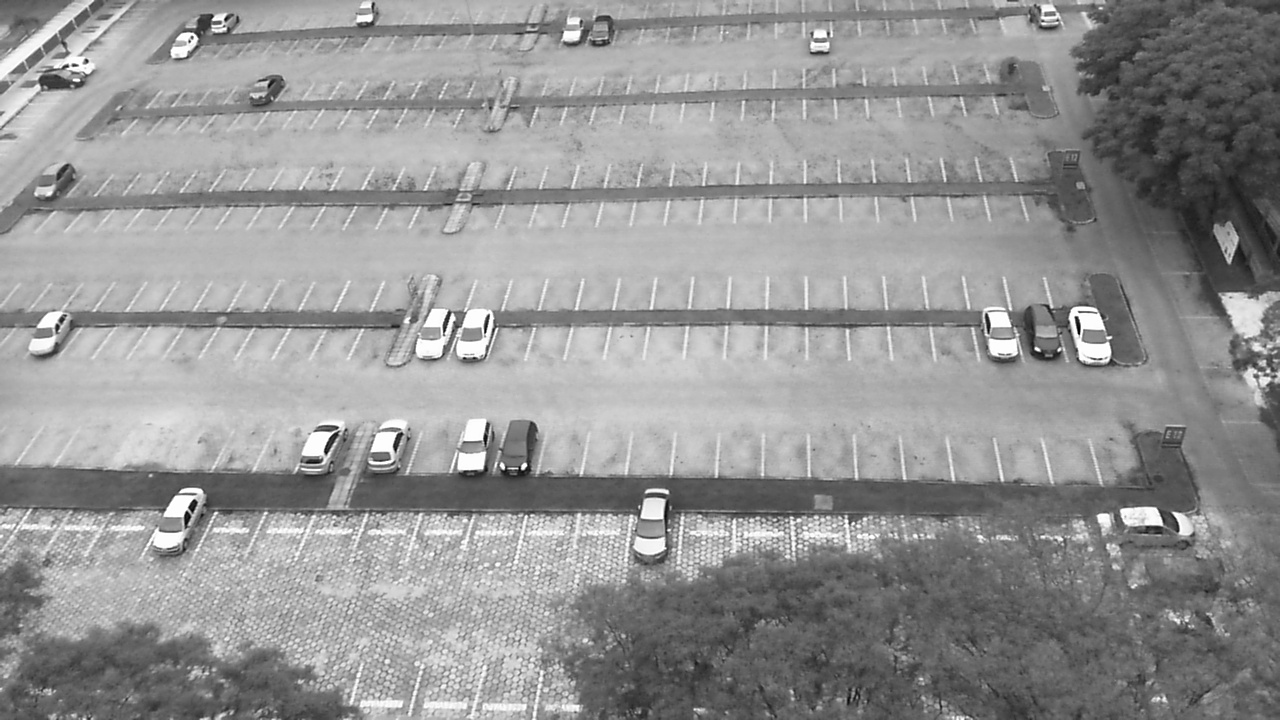

In [36]:
parking_lot = cv2.imread('/content/drive/MyDrive/PCVK Project/Car Park/2012-10-26_06_59_26.jpg')
gray = cv2.cvtColor(src=parking_lot, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

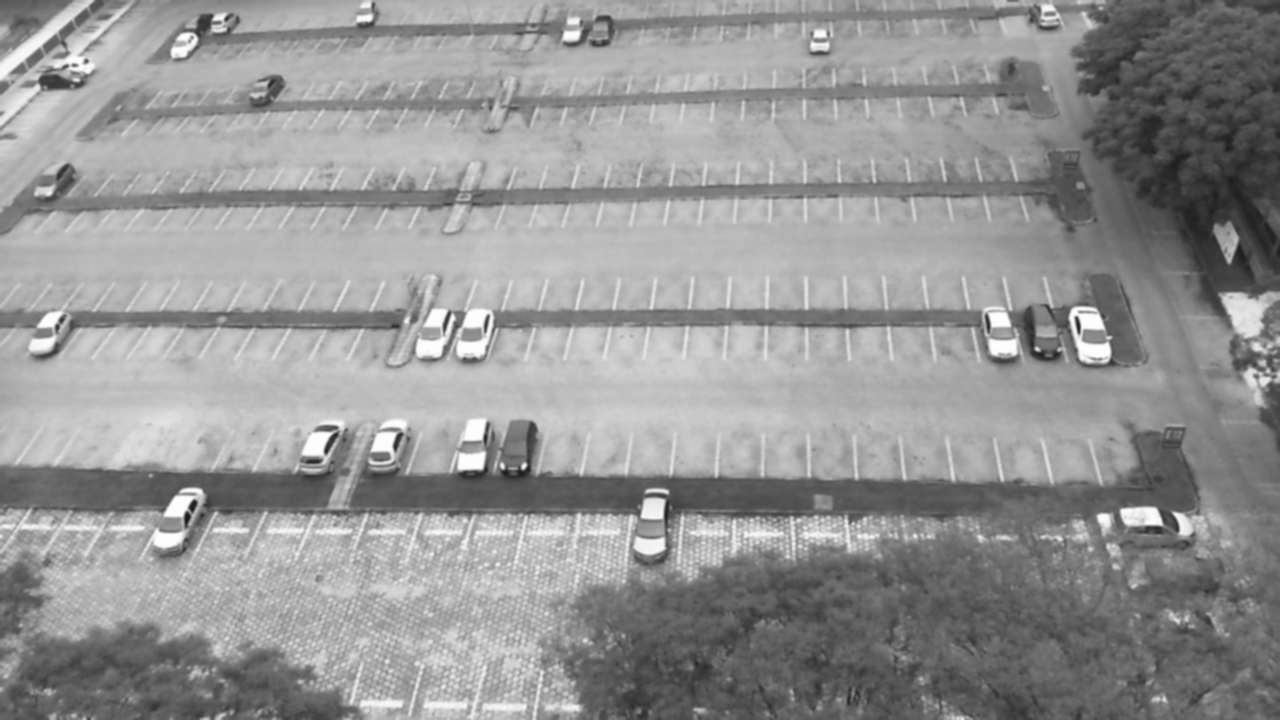

In [37]:
blur_gray = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)
cv2_imshow(blur_gray)

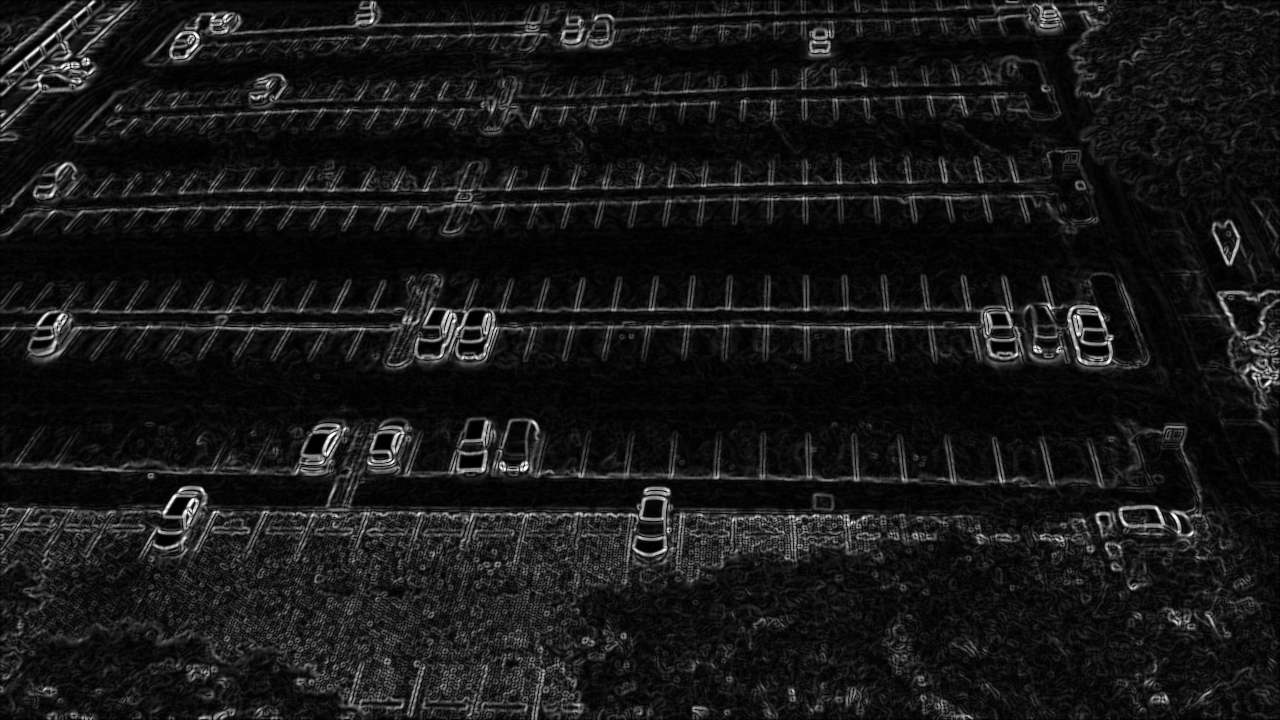

In [38]:
img_sobelx = cv2.Sobel(blur_gray, cv2.CV_64F, 1, 0, ksize=3)
img_sobely = cv2.Sobel(blur_gray, cv2.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(img_sobelx), 0.5, cv2.convertScaleAbs(img_sobely), 0.5, 0)

cv2_imshow(img_sobelxy)

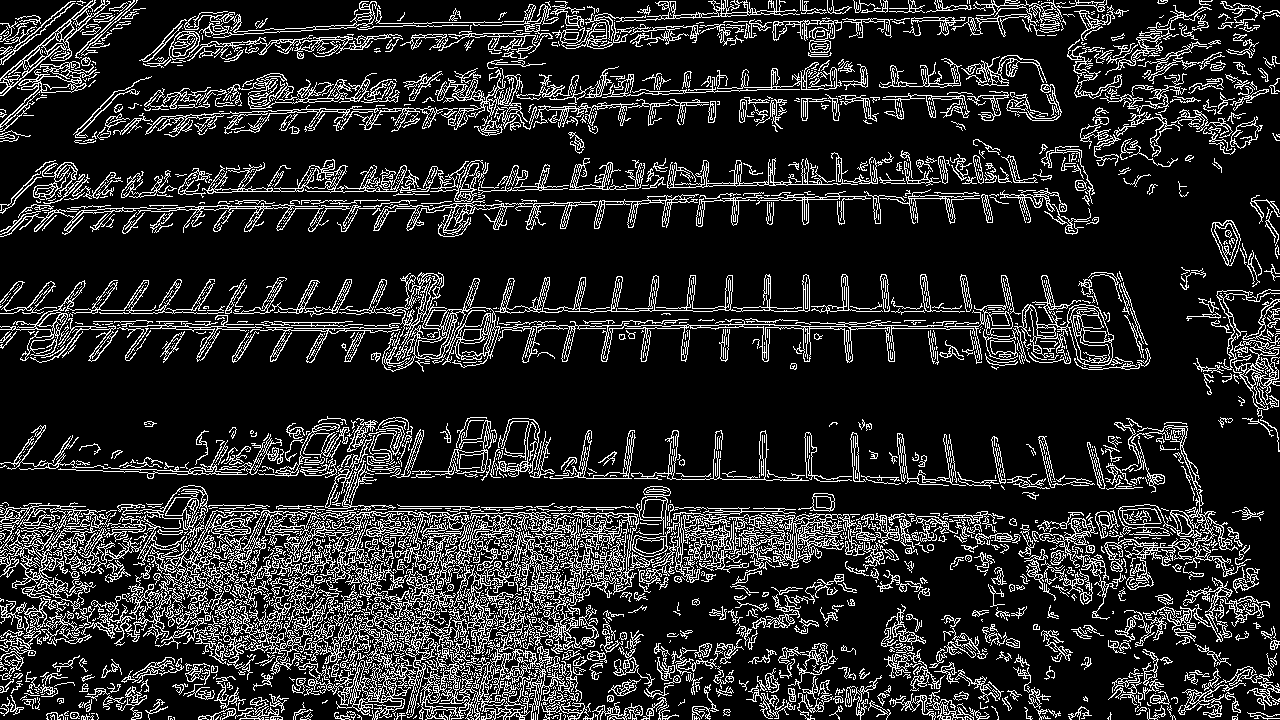

In [39]:
edges = cv2.Canny(img_sobelxy, 50, 150, 3)
cv2_imshow(edges)

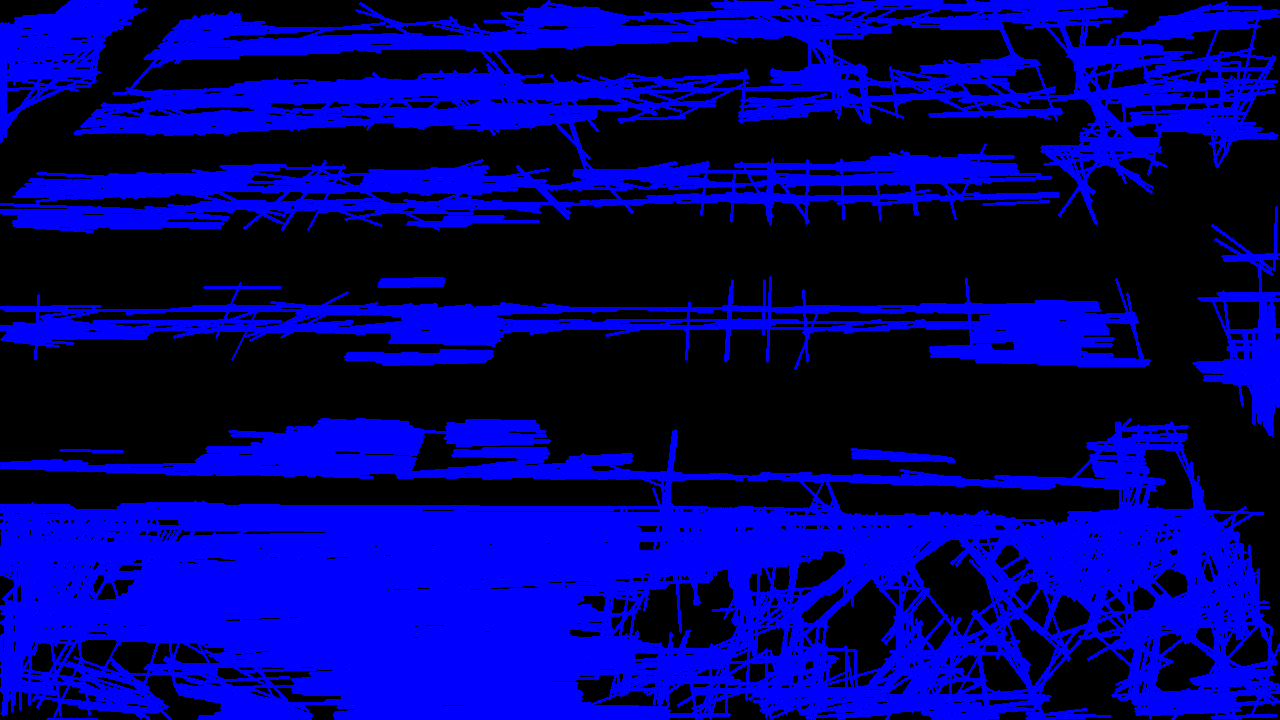

In [44]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(parking_lot) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)

cv2_imshow(line_image)